# Exploratory Data Analysis (EDA) - Loan Prediction

Predicting if loans will be approved or not.

First we will do some data analysis (univariate and bivariate)

### Libraries

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'


import warnings
warnings.filterwarnings('ignore')

### Loading datasets

In [2]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

train_original = train.copy()
test_original = test.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train.shape, test.shape

((614, 13), (367, 12))

# Exploratory Data Analysis (EDA)

First, lets do some simplified analysis with library sweetviz. This is a nice library to do some fast data analysis. After that lets do some more complex analysis.

In [8]:
sv.analyze(train).show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
sv.compare(train, test).show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Univariate Analysis

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


### Looking for Missing Values

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<font color='red'> For categorical features let's fill missing values by mode and numerical features let's fill by median when the pipeline will be created. </font>

In [14]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [15]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [16]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<font color='red'> Creating a new feature called Total_Income: </font>

In [18]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [19]:
train_original['Total_Income'] = train_original['ApplicantIncome'] + train_original['CoapplicantIncome']
test_original['Total_Income'] = test_original['ApplicantIncome'] + test_original['CoapplicantIncome']

train_original['Bin_Loan_Status'] = pd.Series(np.where(train_original.Loan_Status.values == 'Y', 1, 0), train_original.index)
test_original['Bin_Loan_Status'] = pd.Series(np.where(train.Loan_Status.values == 'yes', 1, 0), train.index)

# Export data
data_file_out1 = 'train_dataset_1.csv'
data_file_out2 = 'test_dataset_1.csv'

train_original.to_csv(data_file_out1, index=False)
test_original.to_csv(data_file_out2, index=False)

###### Target Variable

In [20]:
# Creating series:
tab = train['Loan_Status'].value_counts().to_frame()    

tab_rel = train['Loan_Status'].value_counts(normalize = True).to_frame()
tab_rel['Loan_Status'] = round(tab_rel['Loan_Status'], 2)


# Creating charts:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x = tab.index,
                     y = tab['Loan_Status'],
                     name = 'Amount of Loans Approved (Y) or Not (N)',
                     marker_color = '#EDC824',
                     opacity = .7),
              row = 1,
              col = 1
             )


fig.add_trace(go.Bar(x = tab_rel.index,
                     y = tab_rel['Loan_Status'],
                     name = '% of Loans Approved (Y) or Not (N)',
                     marker_color = '#08AA09',
                     opacity = .5),
              row = 1,
              col = 2
             )

# Update Layout and axis:
fig.update_yaxes(showgrid=False, title_text = "Amount", row = 1, col = 1)
fig.update_yaxes(showgrid=False, title_text = "Percentage (%)", row = 1, col = 2)
fig.update_xaxes(title_text = "Approved (Y) or Not Approved (N)", row = 1, col = 1)
fig.update_xaxes(title_text = "Approved (Y) or Not Approved (N)", row = 1, col = 2)

fig.update_layout(legend=dict(orientation="h", 
                              yanchor="bottom",
                              y=1.05,
                              xanchor="left",
                              x=0,
                             ),
                  height=600, 
                  width=1000
                 )

fig.show()

###### Independent Variable (Categorical Features)

In [21]:
# Creating series:

gender = train['Gender'].value_counts(normalize = True).to_frame().reset_index()
gender = gender.rename(columns=({'index': 'Status', 'Gender': 'Total'}))
gender['Total'] = round(gender['Total'], 2)

married = train['Married'].value_counts(normalize = True).to_frame().reset_index()
married = married.rename(columns=({'index': 'Status', 'Married': 'Total'}))
married['Total'] = round(married['Total'], 2)

self_employed = train['Self_Employed'].value_counts(normalize = True).to_frame().reset_index()
self_employed = self_employed.rename(columns=({'index': 'Status', 'Self_Employed': 'Total'}))
self_employed['Total'] = round(self_employed['Total'], 2)

credit_history = train['Credit_History'].value_counts(normalize = True).to_frame().reset_index()
credit_history = credit_history.rename(columns=({'index': 'Status', 'Credit_History': 'Total'}))
credit_history['Total'] = round(credit_history['Total'], 2)


# Creating charts:
fig = make_subplots(rows=2, cols=2)

# Gender series:
fig.add_trace(go.Bar(x = gender['Status'],
                     y = gender['Total'],
                     name = '% of people by gender',
                     marker_color = '#EDC824',
                     opacity = .7),
              row = 1,
              col = 1
             )

# Married series:
fig.add_trace(go.Bar(x = married['Status'],
                     y = married['Total'],
                     name = '% of people by marital status',
                     marker_color = '#08AA09',
                     opacity = .5),
              row = 1,
              col = 2
             )

# Self Employed series:
fig.add_trace(go.Bar(x = self_employed['Status'],
                     y = self_employed['Total'],
                     name = '% of people self employed',
                     marker_color = '#12B6A1',
                     opacity = .7),
              row = 2,
              col = 1
             )

# Credit History series:
fig.add_trace(go.Bar(x = credit_history['Status'],
                     y = credit_history['Total'],
                     name = '% of people with credit history',
                     marker_color = '#141461',
                     opacity = .5),
              row = 2,
              col = 2
             )


# Update layout and axis:
fig.update_xaxes(title_text='Gender', row=1, col=1)
fig.update_xaxes(title_text='Married', row=1, col=2)
fig.update_xaxes(title_text='Self Employed', row=2, col=1)
fig.update_xaxes(title_text='Credit History', row=2, col=2)

fig.update_yaxes(showgrid=False)

fig.update_layout(legend=dict(orientation="h", 
                              yanchor="bottom",
                              y=1,
                              xanchor="left",
                              x=0,
                             ),
                  height=600, 
                  width=1000
                 )

fig.show()

###### Independent Variable (Ordinal Features)

In [22]:
# Creating series:

dependents = train['Dependents'].value_counts(normalize = True).to_frame().reset_index()
dependents = dependents.rename(columns=({'index': 'Status', 'Dependents': 'Total'}))
dependents['Total'] = round(dependents['Total'], 2)
dependents['Status'].replace('3+', 3, inplace = True)

education = train['Education'].value_counts(normalize = True).to_frame().reset_index()
education = education.rename(columns=({'index': 'Status', 'Education': 'Total'}))
education['Total'] = round(education['Total'], 2)

property_area = train['Property_Area'].value_counts(normalize = True).to_frame().reset_index()
property_area = property_area.rename(columns=({'index': 'Status', 'Property_Area': 'Total'}))
property_area['Total'] = round(property_area['Total'], 2)



# Creating charts:
fig = go.Figure()
fig = make_subplots(rows=1, cols=3)

# Dependents series:
fig.add_trace(go.Bar(x = dependents['Status'],
                     y = dependents['Total'],
                     name = '% of people with dependents',
                     marker_color = '#EDC824',
                     opacity = .7),
              row = 1,
              col = 1
             )

# Education series:
fig.add_trace(go.Bar(x = education['Status'],
                     y = education['Total'],
                     name = '% of people by education',
                     marker_color = '#08AA09',
                     opacity = .5),
              row = 1,
              col = 2
             )

# Property Area series:
fig.add_trace(go.Bar(x = property_area['Status'],
                     y = property_area['Total'],
                     name = '% of people by property area',
                     marker_color = '#12B6A1',
                     opacity = .7),
              row = 1,
              col = 3
             )

# Update layout and axis:
fig.update_xaxes(title_text='Number of dependents', row=1, col=1)
fig.update_xaxes(title_text='Education', row=1, col=2)
fig.update_xaxes(title_text='Area', row=1, col=3)

fig.update_yaxes(showgrid=False)

fig.update_layout(legend=dict(orientation="h", 
                              yanchor="bottom",
                              y=1,
                              xanchor="left",
                              x=0),
                  height=400, 
                  width=1000
                 )

fig.show()

###### Independent Variable (Numerical Features)

In [23]:
numerical_cols = train.select_dtypes(exclude=['object']).columns
numerical_cols = list(numerical_cols)
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total_Income']

In [24]:
del(numerical_cols[3:5])
numerical_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']

Create a function to plot histogram of the feature and the log of the feature. 

P.S.: xframe is the name of object (dataset).

In [25]:
def draw_charts(xframe, name_of_feature):

    # Creating charts:
    fig = go.Figure()
    fig = make_subplots(rows=2, cols=2)
    
    
    
    # Histogram of the feature:
    fig.add_trace(go.Histogram(x = xframe[name_of_feature], 
                               name = 'Frequency from ' + name_of_feature, 
                               marker_color = '#12B6A1',
                               opacity = .7
                              ),

                  row = 1,
                  col = 1
                 )
    
    
    # Boxplot of the feature:
    fig.add_trace(go.Box(y = xframe[name_of_feature], 
                         name='Distribution from ' + name_of_feature, 
                         marker_color = '#12B6A1', 
                         line_color = '#12B6A1',
                         opacity = .8
                        ),
                  row = 1,
                  col = 2
                 )
    
    
    

    # Histogram of natural logarithm from (1+p) from the feature:
    fig.add_trace(go.Histogram(x = np.log1p(xframe[name_of_feature]), 
                               name = 'Frequency from natural logarithm of one plus ' + name_of_feature, 
                               marker_color = '#141461',
                               opacity = .7
                              ),

                  row = 2,
                  col = 1
                 )

    # Boxplot of natural logarithm from (1+p) from the feature:
    fig.add_trace(go.Box(y = np.log1p(xframe[name_of_feature]), 
                         name='Distribution from natural logarithm of one plus ' + name_of_feature, 
                         marker_color = '#141461', 
                         line_color = '#141461',
                         opacity = .8
                        ),
                  row = 2,
                  col = 2
                 )

    # Update layout and axis:
    fig.update_xaxes(title_text = name_of_feature, row=1, col=1)
    fig.update_xaxes(title_text = 'ln one plus ' + name_of_feature, row=2, col=1)

    fig.update_yaxes(showgrid=False, title_text = 'Frequency from ' + name_of_feature, row = 1, col = 1)
    fig.update_yaxes(showgrid=False, title_text = 'Frequency from natural logarithm of one plus ' + name_of_feature, row = 2, col = 1)
    
    fig.update_yaxes(showgrid=False, title_text = name_of_feature, row = 1, col = 2)
    fig.update_yaxes(showgrid=False, title_text = 'natural logarithm of one plus ' + name_of_feature, row = 2, col = 2)

    fig.update_layout(legend=dict(orientation="h", 
                                  yanchor="bottom",
                                  y=1,
                                  xanchor="left",
                                  x=0
                                 ),
                      height=1000, 
                      width=1000
                     )

    return fig.show()

##### <font color='blUE'> Training Set </font>

In [26]:
for i in numerical_cols:
    draw_charts(train, i)

As you can see on charts, all numerical features are right-skewed but after a log transformation all features bring better and them look like a normal distribution:

### Bivariate Analysis

###### Categorical Features vs Loan_Status

Creating the function bivariate_bars to do Bar Charts and compare the feature versus Loan Status:

In [27]:
def bivariate_bars(name_of_dataframe, name_of_categorical_feature):

    # Creating series:
    xbivar = pd.crosstab(name_of_dataframe[name_of_categorical_feature], name_of_dataframe['Loan_Status']).reset_index()
    #gender

    # Creating bar charts:
    fig = go.Figure()

    # Approved:
    fig.add_trace(go.Bar(name = 'Approved', 
                         x = xbivar[name_of_categorical_feature], 
                         y = xbivar['Y'], 
                         marker_color = '#08AA09', 
                         opacity = .8
                        )
                 )

    # Not Approved:
    fig.add_trace(go.Bar(name = 'Not Approved', 
                         x = xbivar[name_of_categorical_feature], 
                         y = xbivar['N'], 
                         marker_color = '#E11901', 
                         opacity = .8
                        )
                 )

    # Update layout and Axis:
    fig.update_layout(title = 'Distribution of Approved or Not Approved - ' + name_of_categorical_feature,
                      barmode ='stack', 
                      barnorm = 'percent',
                      height = 400, 
                      width = 900)

    fig.update_xaxes(title_text = name_of_categorical_feature, type='category')
    fig.update_yaxes(showgrid = False, title_text='Percent (%)')

    return fig.show()

In [28]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']:
    
    bivariate_bars(train, i)

###### Numerical Features vs Loan_Status

Creating some new features by bins:

In [29]:
# Creating a new column Income_Bin by range of Applicant Income:
bins=[0, 2000, 6000, 10000, 100000]
group = ['Low', 'Average', 'High', 'Very High']
train['ApplicantIncome_Bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

# Creating a new column Total Income Bin:
ranges = [0, 2000, 6000, 10000, 100000]
groups = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_Bin'] = pd.cut(train['Total_Income'], ranges, labels = groups)

# Creating a new column Loan Amount Bin:
ranges = [0, 100, 200, 700]
groups = ['Low', 'Average', 'High']
train['Loan_Amount_Bin'] = pd.cut(train['LoanAmount'], ranges, labels = groups)

# Creating a new column Coapplicant Income Bin by range of Coapplicant Income:
bins=[0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_Bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

Creating the function bivar_hist to do histograms of the feature versus Loan Status:

In [30]:
import plotly.figure_factory as ff

def bivar_hist(name_df, name_of_numerical_feature, binsize):
    
    #creating series of natuarl logarithm fro  (1+p):
    x1 = np.log1p(name_df[name_df['Loan_Status'] == 'Y'][name_of_numerical_feature])
    x2 = np.log1p(name_df[name_df['Loan_Status'] == 'N'][name_of_numerical_feature])

    hist_data = [x1, x2]

    group_labels = ['Approved', 'Not Approved']

    colors = ['#08AA09', '#E11901']


    # Create distplot with curve_type set to 'normal'
    fig = ff.create_distplot(hist_data, 
                             group_labels, 
                             colors = colors,
                             bin_size = binsize, 
                             show_rug = False)

    # Add title
    fig.update_layout(title_text='Histogram and Curve Plot from Ln(1 + ' + name_of_numerical_feature + ')')
    fig.update_yaxes(showgrid=False)
    return fig.show()

Running the function bivar_hist to do histograms by Approved and Not Approved:

In [31]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmount']:
    bivar_hist(train, i, 0.07)

Running the function bivariate_bars to do histograms by Approved and Not Approved:

In [32]:
for i in ['ApplicantIncome_Bin', 'Coapplicant_Income_Bin', 'Total_Income_Bin', 'Loan_Amount_Bin']:
    bivariate_bars(train, i)

 <font color='red'> Transforming some features applying Natural Logarithm Function and doing some replacements: </font>

In [33]:
train['log_ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
train['log_CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])
train['log_Total_Income'] = np.log1p(train['Total_Income'])
train['log_LoanAmount'] = np.log1p(train['LoanAmount'])


test['log_ApplicantIncome'] = np.log1p(test['ApplicantIncome'])
test['log_CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])
test['log_Total_Income'] = np.log1p(test['Total_Income'])
test['log_LoanAmount'] = np.log1p(test['LoanAmount'])



train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)

train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Total_Income,ApplicantIncome_Bin,Total_Income_Bin,Loan_Amount_Bin,Coapplicant_Income_Bin,log_ApplicantIncome,log_CoapplicantIncome,log_Total_Income,log_LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,1,5849.0,Average,Average,Average,NaN,8.674197,0.000000,8.674197,4.859812
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,0,6091.0,Average,High,Average,Average,8.430327,7.319202,8.714732,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,3000.0,Average,Average,Low,NaN,8.006701,0.000000,8.006701,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,1,4941.0,Average,Average,Average,Average,7.857094,7.765993,8.505525,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,1,6000.0,Average,Average,Average,NaN,8.699681,0.000000,8.699681,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,...,1,2900.0,Average,Average,Low,NaN,7.972811,0.000000,7.972811,4.276666
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,...,1,4106.0,Average,Average,Low,NaN,8.320448,0.000000,8.320448,3.713572
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,...,1,8312.0,High,High,High,Low,8.996280,5.484797,9.025576,5.537334
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,...,1,7583.0,High,High,Average,NaN,8.933796,0.000000,8.933796,5.236442


### Correlation Matrix

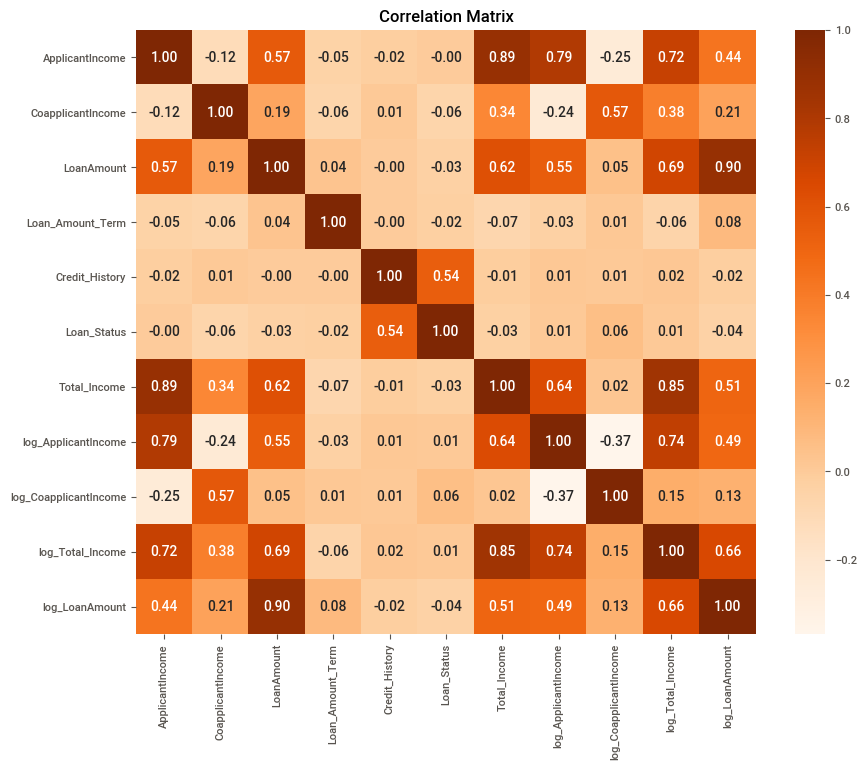

In [34]:
matrix = train.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(matrix,
            annot = True,
            fmt = '.2f',
            cmap='Oranges')

plt.title('Correlation Matrix')

plt.show()

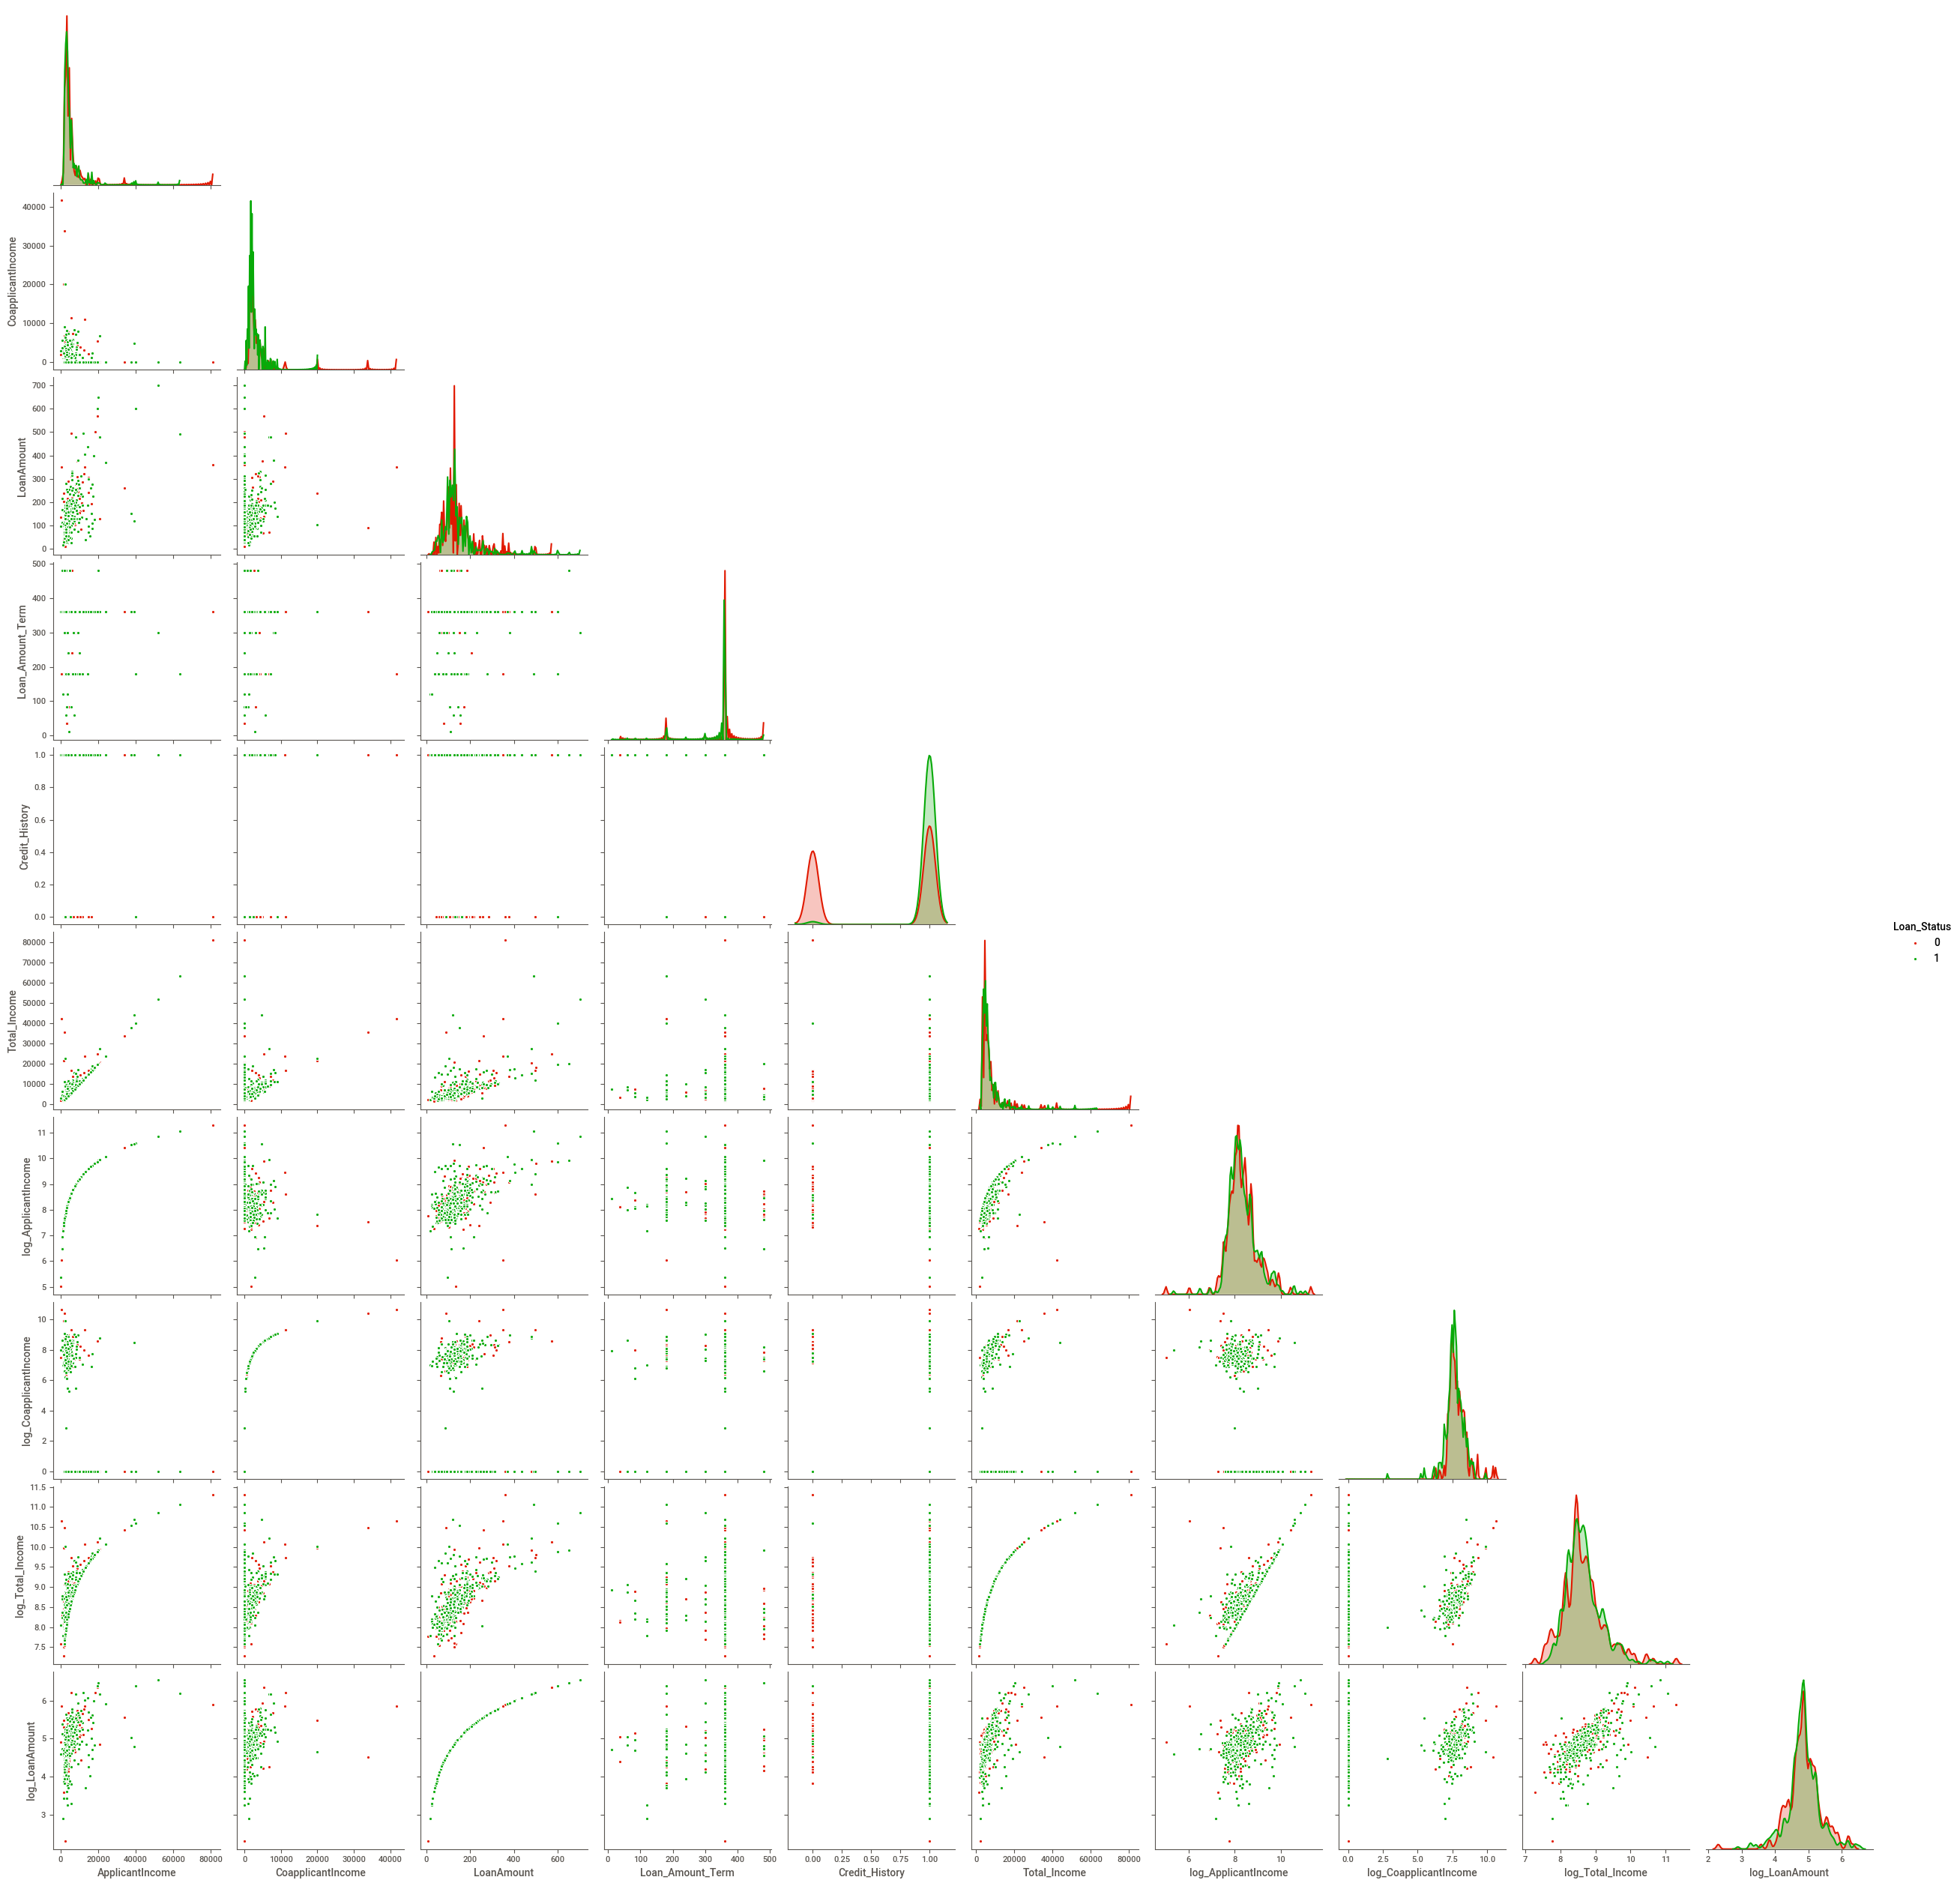

In [35]:
# Creating a list with the names of numerical features:
num_col = train.select_dtypes(exclude=['object']).columns

# Creating a object with only numerical features:
df_num = train[num_col]

# Creating a Pair Plot using Seaborn:
fig = sns.pairplot(df_num, 
                   hue = 'Loan_Status',
                   diag_kws={'bw': 0.05}, 
                   corner=True, 
                   palette={0: '#E11901', 1: '#08AA09'}
                  )

##### Looking for Outliers:

Creating the function look_for_outliers. This function will bring some informations like amount of outliers above from upper fence or under from lower fence. Besides that This function will create some boxplots:

In [36]:
def look_for_outliers(name_of_dataframe, filter_feature, name_of_feature):
    
    # IQR from feature ApplicantIncome:
    Q1 = name_of_dataframe[name_of_feature].quantile(0.25)
    Q3 = name_of_dataframe[name_of_feature].quantile(0.75)

    upper_fence = Q3 + (1.5 * (Q3-Q1))

    lower_fence = Q1 - (1.5 * (Q3-Q1))

    if lower_fence < 0:
        lower_fence = min(df_num[name_of_feature])

    else:
        lower_fence = Q1 - (1.5 * (Q3-Q1))


    upf = name_of_dataframe[(name_of_dataframe[name_of_feature] > upper_fence)][name_of_feature].count()
    lwf = name_of_dataframe[(name_of_dataframe[name_of_feature] < lower_fence)][name_of_feature].count()
    tot = name_of_dataframe[name_of_feature].count()
    
    # print informations:
    print(name_of_feature + ':', '\n')
    print(f'Upper Fence = {upper_fence}.')
    print('There are', upf, 'outliers above of Upper Fence.', 
          "It's about %.2f%%" % (upf / tot * 100), 'of all dataset. \n')

    print(f'Lower Fence = {lower_fence}.')
    print('There are', lwf, 'outliers under the Lower Fence or Minimum.', 
          "It's about %.2f%%" % (lwf / tot * 100), 'of all dataset. \n\n\n')
    
    # creating boxplot:
    fig = go.Figure()
    
    fig.add_trace(go.Box(y = name_of_dataframe[name_of_dataframe[filter_feature]==0][name_of_feature], x = name_of_dataframe[name_of_dataframe[filter_feature]==0][filter_feature], name='Not approved', marker_color = '#E11901', line_color = '#E11901'))
    fig.add_trace(go.Box(y = name_of_dataframe[name_of_dataframe[filter_feature]==1][name_of_feature], x = name_of_dataframe[name_of_dataframe[filter_feature]==1][filter_feature], name='Approved', marker_color = '#08AA09', line_color = '#08AA09'))
    
    fig.update_layout(title_text = 'Boxplot of ' + name_of_feature,
                      yaxis_title = name_of_feature, 
                      height=500, 
                      width=800
                     )
    fig.update_yaxes(showgrid=False)
    
    fig.show()

Running the function look_for_outliers:

In [37]:
for i in list(['ApplicantIncome', 'log_ApplicantIncome', 'CoapplicantIncome', 'log_CoapplicantIncome', 
               'LoanAmount', 'log_LoanAmount', 'Total_Income', 'log_Total_Income']):
    
    look_for_outliers(df_num, 'Loan_Status', i)

ApplicantIncome: 

Upper Fence = 10171.25.
There are 50 outliers above of Upper Fence. It's about 8.14% of all dataset. 

Lower Fence = 150.
There are 0 outliers under the Lower Fence or Minimum. It's about 0.00% of all dataset. 



log_ApplicantIncome: 

Upper Fence = 9.714769169065528.
There are 21 outliers above of Upper Fence. It's about 3.42% of all dataset. 

Lower Fence = 6.915177213877902.
There are 6 outliers under the Lower Fence or Minimum. It's about 0.98% of all dataset. 



CoapplicantIncome: 

Upper Fence = 5743.125.
There are 18 outliers above of Upper Fence. It's about 2.93% of all dataset. 

Lower Fence = 0.0.
There are 0 outliers under the Lower Fence or Minimum. It's about 0.00% of all dataset. 



log_CoapplicantIncome: 

Upper Fence = 19.349742043898722.
There are 0 outliers above of Upper Fence. It's about 0.00% of all dataset. 

Lower Fence = 0.0.
There are 0 outliers under the Lower Fence or Minimum. It's about 0.00% of all dataset. 



LoanAmount: 

Upper Fenc

Although there are some outliers we won't drop them. Let's use Robust Scaler to reduce effects from those outliers.